In [1]:
#An attempt by N Malakar
#Aug 27, 2020
# Thanks QC class, Especially Shree and  Sovit
#References: https://github.com/anpaschool/QC-School-Fall2020/blob/master/Tuesday-Formal/Lecture2-QC-Fall2020.ipynb
#https://qiskit.org/textbook/ch-states/representing-qubit-states.html

from qiskit import QuantumCircuit, execute,QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector,plot_state_qsphere
from math import sqrt, pi
import numpy as np
%matplotlib inline

In [2]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('text')  # Let's view our circuit (text drawing is required for the 'Initialize' gate due to a known bug in qiskit)

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

[0.+0.j 1.+0.j]


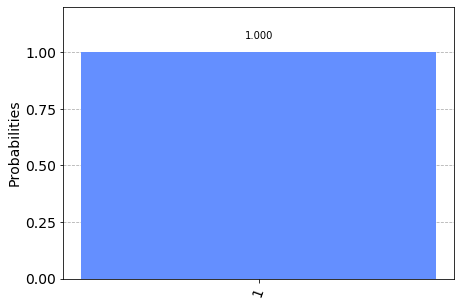

In [3]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
job = execute(qc,backend).result() # Do the simulation, returning the state vector
print(job.get_statevector())
out_state = job.get_statevector()
qc.measure_all()
qc.draw('text')

result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

#print(out_state) # Display the output state vector
#plot_bloch_multivector(job.get_statevector()) # Display the output state vector

In [4]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
qc.draw('text')



┌──────────────────────────────┐
q_0: ┤ initialize(0.70711,0.70711j) ├
     └──────────────────────────────┘

[0.70710678+0.j         0.        +0.70710678j]


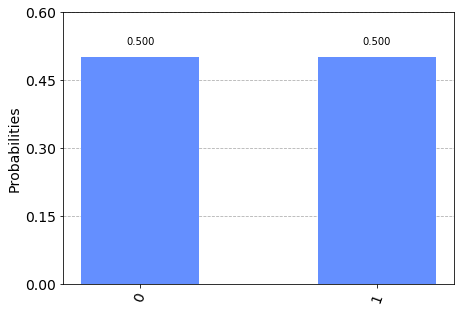

In [5]:
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result
 #-------------
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [6]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

qc.measure_all()
qc.draw('text')

Qubit State = [0.70710678+0.j         0.        +0.70710678j]


┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711,0.70711j) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

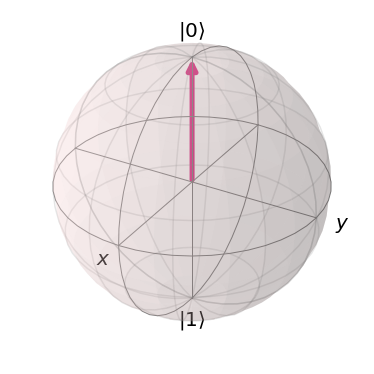

In [12]:
# Installed https://github.com/qiskit-community/qiskit-textbookpip 
# install ./qiskit-textbook-src
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [0,pi/2,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates
 

# Quick Exercise

Visual representation of Qubit State
$$ |q> = cos \frac{\theta}{2} |0>  + e^{i\phi} sin \frac{\theta}{2} |1>$$ 

If we interpret $\theta$ and {\phi} as spherical co-ordinates (with r = 1), we can plot any qubit state on the surface of a sphere, known as the Bloch sphere.

The qubit state $|+>$ is in the state of $\theta =  \frac{\theta}{2} $ and $\phi = 0$.

Use plot_bloch_vector() or plot_bloch_sphere_spherical() to plot a qubit in the states:
|0>


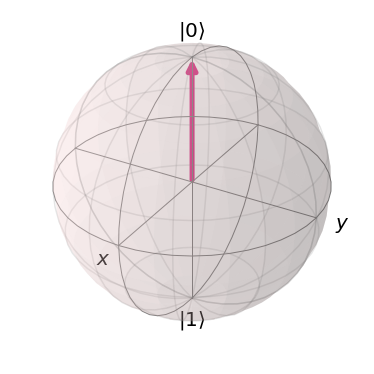

In [8]:
#Use plot_bloch_vector() or plot_bloch_sphere_spherical() to plot a qubit in the states: |0>
coords = [0,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates
 

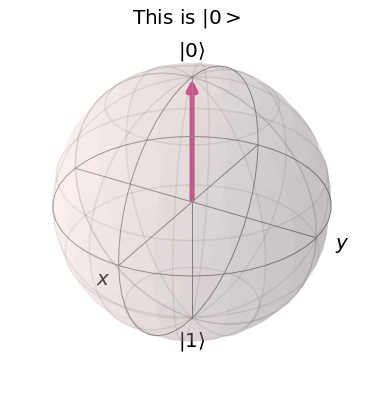

In [9]:
#or, use plot_bloch_vector
from qiskit.visualization import plot_bloch_vector
%matplotlib inline
plot_bloch_vector([0,0,1], title="This is $|0>$")

Use plot_bloch_vector() or plot_bloch_sphere_spherical() to plot a qubit in the states:
|1>

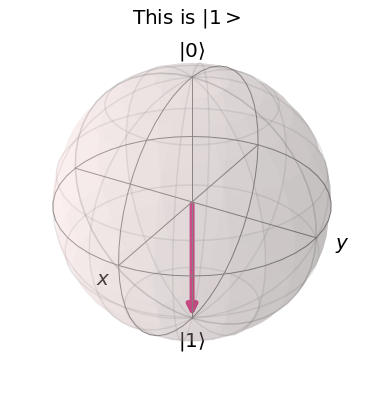

In [10]:
coords = [ pi ,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates
 
#alternatively,
 

plot_bloch_vector([0,0,-1], title="This is $|1>$")

Now plotting $\frac{1}{\sqrt{2}} \left( |0> + |1> \right)$

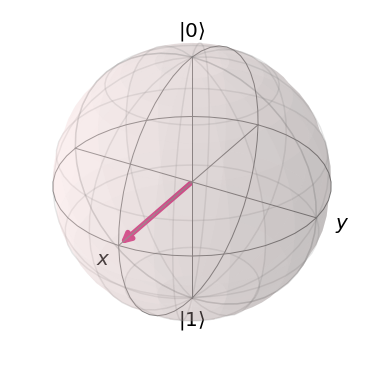

In [11]:
# the theta is pi/2, phi is 0, r is 1
coords = [ pi/2 ,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates
 
#plot_bloch_vector([1  ,0 ,0] , title="This is $|1>$") ???
# the multivector plot is having issues in this version...see https://github.com/Qiskit/qiskit-terra/issues/4982
# https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html#qiskit.visualization.plot_bloch_multivector 

To do for the reader... if you are reading this, try the following:
Use plot_bloch_vector() or plot_bloch_sphere_spherical() to plot a qubit in the states:
$\frac{1}{\sqrt{2}} \left( |0>  - i |1> \right)$

To do for the reader... if you are reading this, try the following:
Use plot_bloch_vector() or plot_bloch_sphere_spherical() to plot a qubit in the states:
$\frac{1}{\sqrt{2}}  \begin{bmatrix}
i\\
1
\end{bmatrix} $